In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
import sklearn.metrics as sm

df = pd.read_csv("energydata.csv")
df


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [22]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [23]:
# 要素の個数、頻度の確認
df.apply(lambda x: len(x.unique()))


date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [24]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


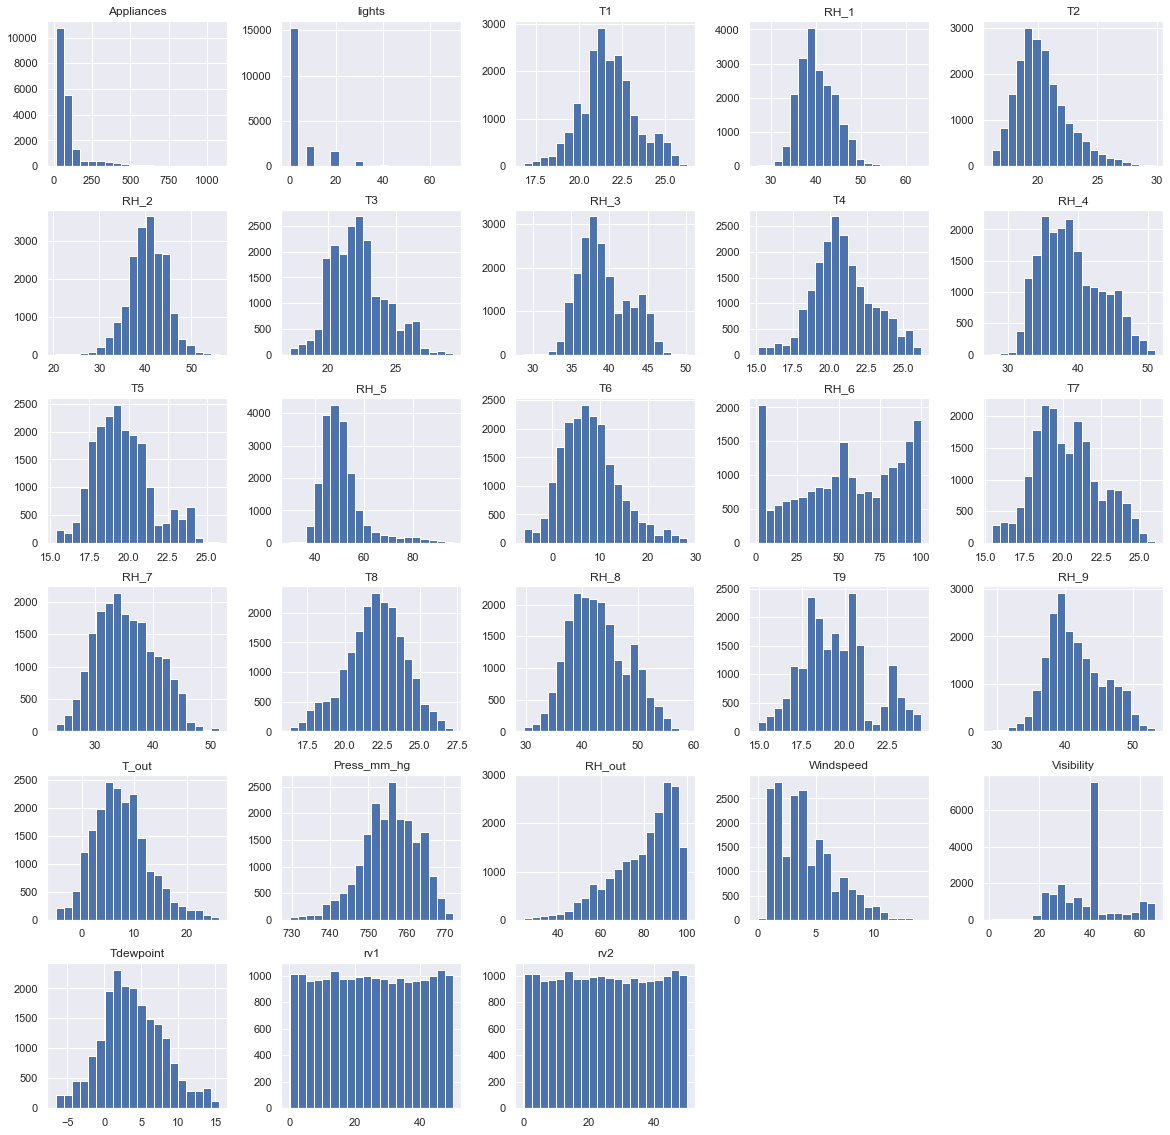

In [25]:
# ヒストグラムだけ表示する
df.hist(bins = 20 , figsize= (20,20)) ;


<AxesSubplot:xlabel='Appliances', ylabel='Count'>

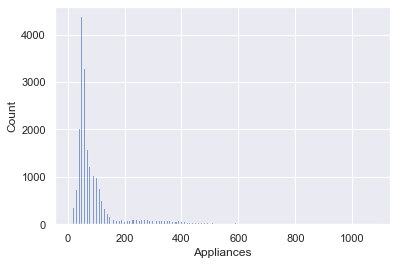

In [26]:
# 外れ値のチェック
sns.histplot(df["Appliances"])


<AxesSubplot:>

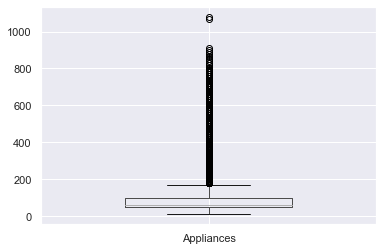

In [27]:
# 箱ひげ図の表示
df.boxplot(column="Appliances",widths=0.5)

<AxesSubplot:xlabel='Appliances', ylabel='Count'>

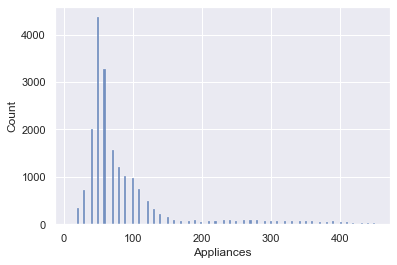

In [28]:
# 分位数を指定して外れ値を削除
df = df[df['Appliances'].between(df['Appliances'].quantile(.0), df['Appliances'].quantile(.98))]

# データの再確認
sns.histplot(df["Appliances"])

<AxesSubplot:>

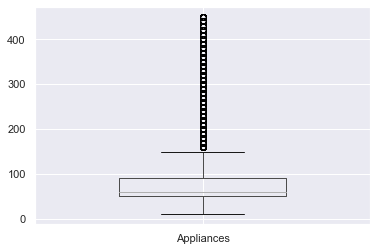

In [29]:
# 箱ひげ図の表示
df.boxplot(column="Appliances",widths=0.5)

In [30]:
# 外れ値が除去されたことを確認
df[['Appliances']].describe()


,Appliances
count,19350.000000
mean,87.829974
std,74.156368
min,10.000000
25%,50.000000
50%,60.000000
75%,90.000000
max,450.000000


c:\users\hiroa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hiroa\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hiroa\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eit

Text(0.5, 0, 'Appliances log')

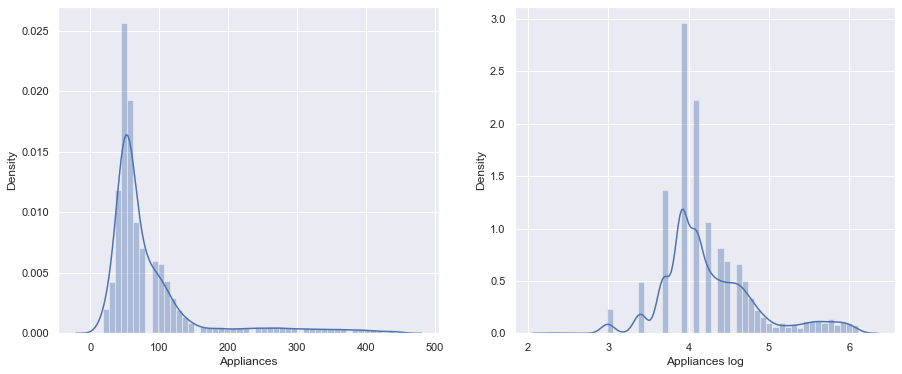

In [31]:
# 対数変換
df['log_appliances'] = np.log(df.Appliances)
df

# Applianceのヒストグラム
f, axes = plt.subplots(1, 2,figsize=(15,6))

sns.distplot(df.Appliances, ax=axes[0])
axes[0].set_xlabel('Appliances')

sns.distplot(df.log_appliances, ax=axes[1])
axes[1].set_xlabel('Appliances log')

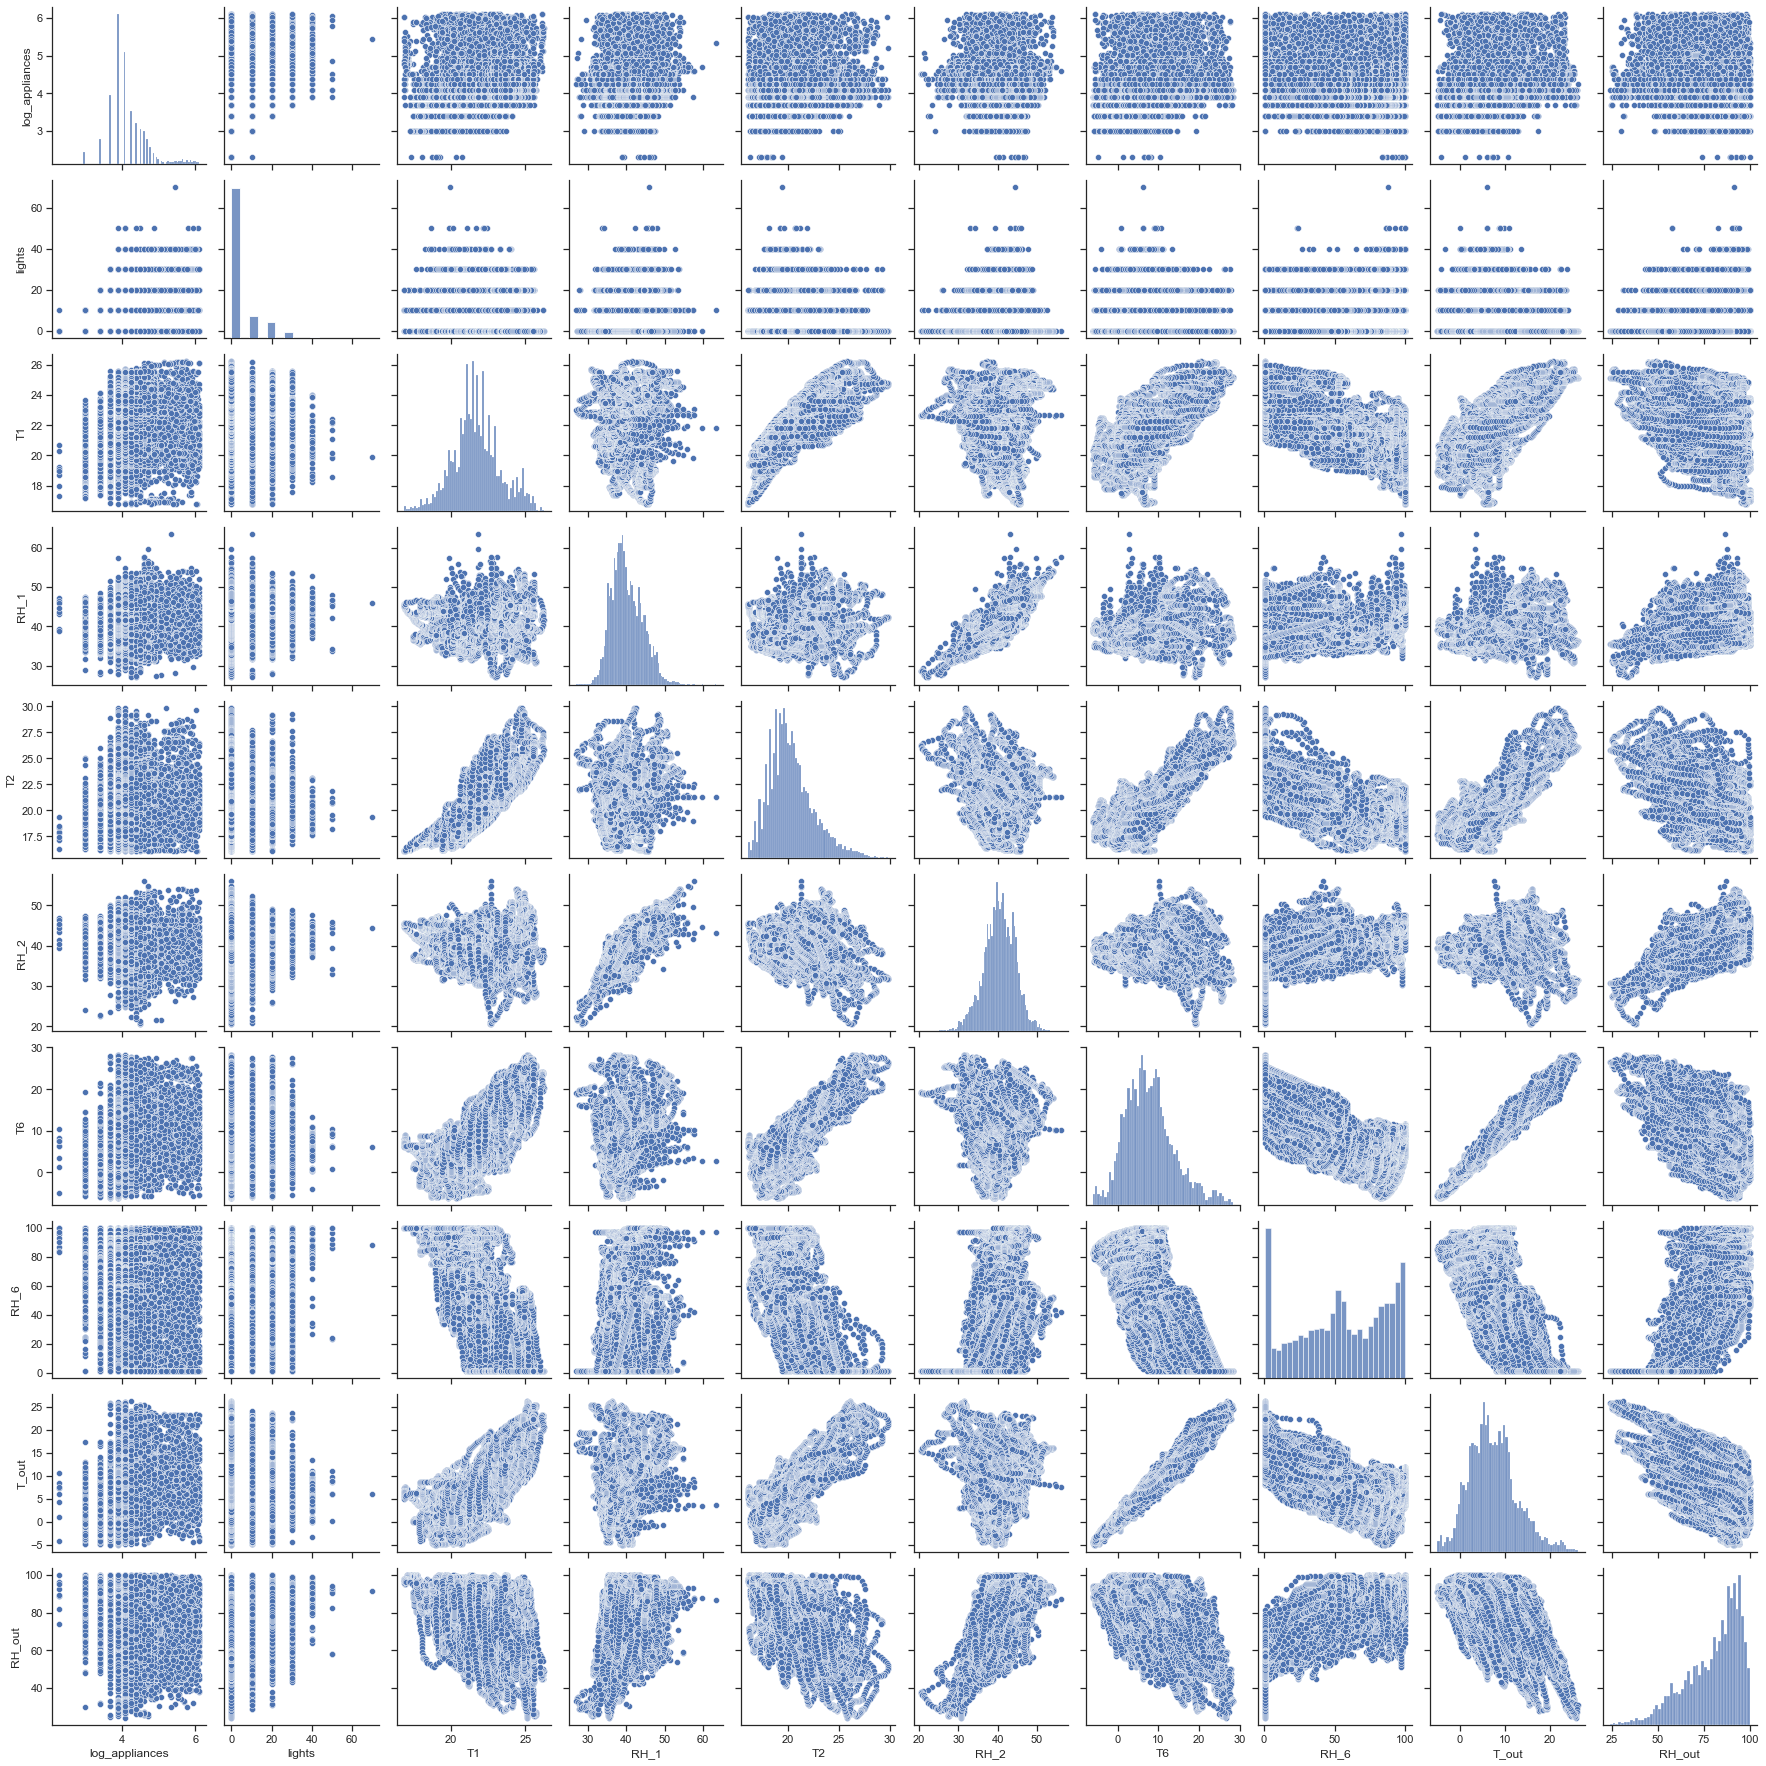

In [32]:
# ヒストグラムと散布図を表示
col = ['log_appliances','lights','T1','RH_1','T2','RH_2','T6','RH_6','T_out','RH_out']
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[col])
plt.show();


In [33]:
# 新たな列を追加
# 年月日
df["split_date"]=df['date'].str.split(' ').str[0]

# 時間、分単位
df["hours"]=(df['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
df["seconds"]=((df['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

# 1週毎
df["week"]=(df['date'].str.split(' ').str[0])
df["week"]=(df['week'].apply(dateutil.parser.parse, dayfirst=True))
df["weekday"]=(df['week'].dt.dayofweek).astype(str).astype(int)
df["week"]=(df['week'].dt.day_name())

df.head(100)

c:\users\hiroa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\hiroa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hiroa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Visibility,Tdewpoint,rv1,rv2,log_appliances,split_date,hours,seconds,week,weekday
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,63.000000,5.300000,13.275433,13.275433,4.094345,2016-01-11,17,0,Tuesday,1
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,59.166667,5.200000,18.606195,18.606195,4.094345,2016-01-11,17,600,Tuesday,1
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,55.333333,5.100000,28.642668,28.642668,3.912023,2016-01-11,17,1200,Tuesday,1
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,51.500000,5.000000,45.410389,45.410389,3.912023,2016-01-11,17,1800,Tuesday,1
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,47.666667,4.900000,10.084097,10.084097,4.094345,2016-01-11,17,2400,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016-01-12 09:00:00,50,0,19.856667,47.063333,19.000000,45.030000,20.100000,45.200000,19.100000,...,40.000000,3.400000,22.763723,22.763723,3.912023,2016-01-12,9,0,Thursday,3
97,2016-01-12 09:10:00,60,0,19.790000,46.656667,19.000000,44.966667,20.100000,45.163333,19.100000,...,38.166667,3.483333,20.504204,20.504204,4.094345,2016-01-12,9,600,Thursday,3
98,2016-01-12 09:20:00,50,0,19.790000,46.333333,19.000000,44.826667,20.100000,45.090000,19.100000,...,36.333333,3.566667,40.543512,40.543512,3.912023,2016-01-12,9,1200,Thursday,3
99,2016-01-12 09:30:00,30,0,19.790000,46.066667,19.000000,44.645000,20.100000,45.163333,19.033333,...,34.500000,3.650000,30.246665,30.246665,3.401197,2016-01-12,9,1800,Thursday,3


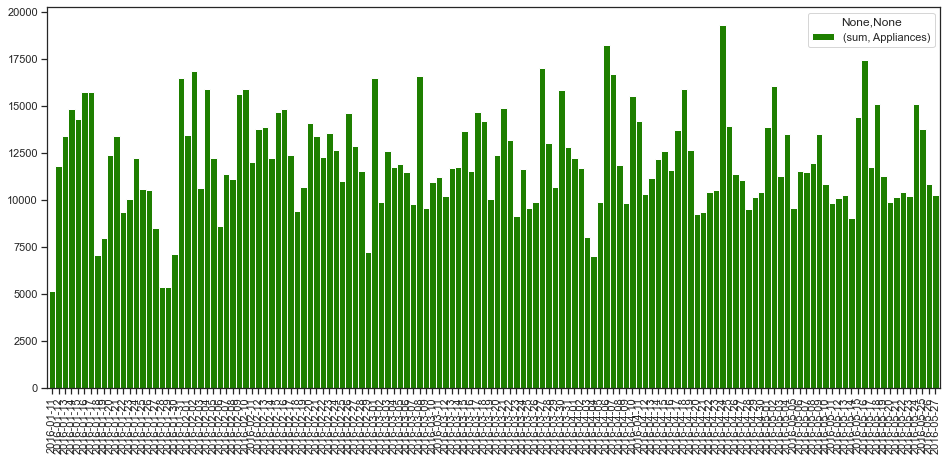

In [34]:
# 日別の電力消費量
dates=df["split_date"].unique()
arranged_day = pd.Categorical(df["split_date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
date_sum = pd.pivot_table(df,values="Appliances",index=date_series, aggfunc=[np.sum],fill_value=0)
date_sum.plot(kind="bar",color="#1E7F00",width=1.0,figsize=(16, 7))
plt.show()


In [35]:
# 週末と平日を各時間帯別の表データを作成
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_week = pd.Categorical(df["week"], categories=days,ordered=True)
day_series = pd.Series(day_week)
day = pd.pivot_table(df,index=["hours"],
               values="Appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)
day


sum                                                  
      Monday Tuesday Wednesday Thursday Friday Saturday Sunday
hours                                                         
0       5760    6540      5980     6610   5760     5900   6160
1       5910    5560      6120     6460   5290     6190   5980
2       5840    5210      5750     5680   5330     5990   5600
3       5730    5240      5330     5720   5470     5550   5630
4       5810    5280      5700     5570   5210     6070   5950
5       5870    5600      5520     6850   6070     6620   5800
6       5800    6000      6160     6910   6630     6020   7550
7       6780    8470      7250    10430   6200     9940   9570
8       9730   11330     10530     9150  11650    10090  13330
9      12140    9470     10780     9090  11890    11790  15830
10     10900    9480     11230     9340  11460    10630  15440
11     13750   11320     11310     8330  11270    10710  16690
12     11460   12560     10650    10140  11680    14260  15500
13     12760   11570     10150    10700  11730    12570  17580
14     11390   10610      9220     8850  12550    11770  12680
15     10320   11310      9630     8230  11970    12020  12460
16     10940   11240      9390    10540  11870    14570  11990
17     11920   13970     12340    14570  14290    16500  14770
18     13410   17290     15380    15060  17930    15630  17410
19     16120   15810     13590    16050  14470    14350  12910
20     14140   13530     15230    15150  12100    12470  12120
21     11480   11160     12610    10870   9310    10260  10660
22      8050    8410      8280     7000   6690     8910   8290
23      5700    7560      7870     6230   6020     6550   6200

<AxesSubplot:xlabel='None-None', ylabel='hours'>

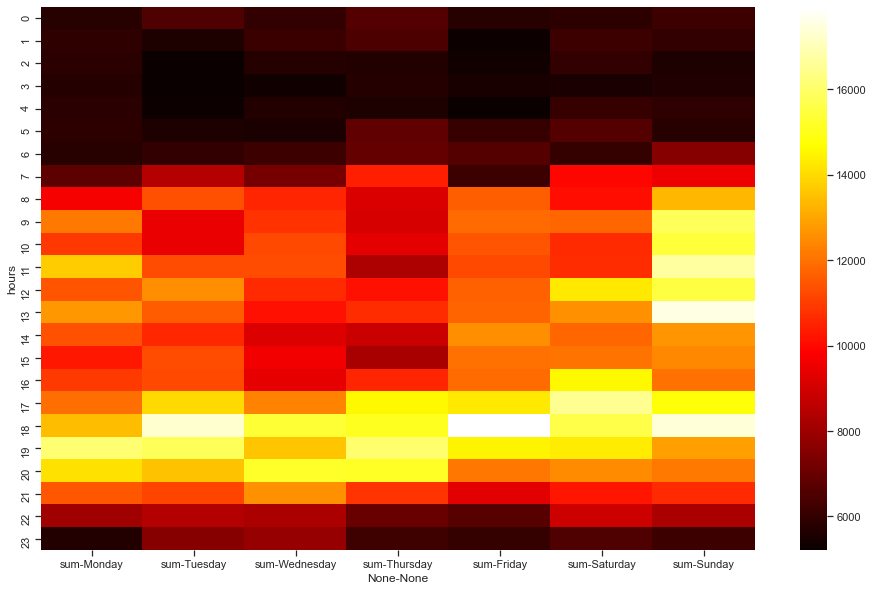

In [36]:
# ヒートマップを表示
plt.figure(figsize=(16, 10)) 
sns.heatmap(day,cmap='hot')


<AxesSubplot:>

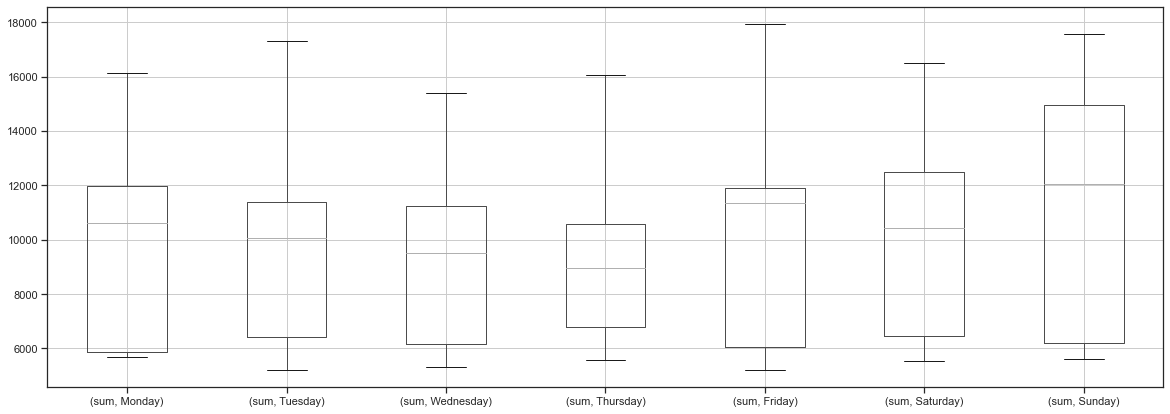

In [37]:
# 曜日ごとに箱ひげ図を表示
day.boxplot(figsize=(20, 7))


In [38]:
# 時間ごとの平均使用量
df['hour_avg'] = list(map(dict(df.groupby('hours')["Appliances"].mean()).get, df.hours))
df

c:\users\hiroa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Tdewpoint,rv1,rv2,log_appliances,split_date,hours,seconds,week,weekday,hour_avg
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,5.300000,13.275433,13.275433,4.094345,2016-01-11,17,0,Tuesday,1,130.724450
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,5.200000,18.606195,18.606195,4.094345,2016-01-11,17,600,Tuesday,1,130.724450
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,5.100000,28.642668,28.642668,3.912023,2016-01-11,17,1200,Tuesday,1,130.724450
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,5.000000,45.410389,45.410389,3.912023,2016-01-11,17,1800,Tuesday,1,130.724450
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,4.900000,10.084097,10.084097,4.094345,2016-01-11,17,2400,Tuesday,1,130.724450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,13.333333,43.096812,43.096812,4.605170,2016-05-27,17,1200,Friday,4,130.724450
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,13.300000,49.282940,49.282940,4.499810,2016-05-27,17,1800,Friday,4,130.724450
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,13.266667,29.199117,29.199117,5.598422,2016-05-27,17,2400,Friday,4,130.724450
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,13.233333,6.322784,6.322784,6.040255,2016-05-27,17,3000,Friday,4,130.724450


c:\users\hiroa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,log_appliances,hours,seconds,weekday,hour_avg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,6.166667,53.416667,5.050000,26.823044,26.823044,4.003184,17,1500,1,130.724450
2016-01-11 18:00:00,96.000000,50.000000,19.864000,45.775500,19.237333,44.446667,19.766000,44.870667,18.890000,45.994000,...,5.333333,40.000000,4.666667,25.023480,25.023480,4.393922,18,1200,1,152.822903
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,6.000000,40.000000,4.391667,33.734932,33.734932,4.923982,19,1500,1,131.359102
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,6.000000,40.000000,4.016667,25.679642,25.679642,4.793191,20,1500,1,119.491945
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,6.000000,40.000000,3.816667,18.826274,18.826274,4.636940,21,1500,1,94.315403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,25.544444,46.638889,26.421369,41.205054,28.397778,41.160000,24.666667,45.883889,...,2.000000,21.583333,13.475000,27.553946,27.553946,4.497876,14,1500,4,97.723881
2016-05-27 15:00:00,76.666667,0.000000,25.500000,45.677639,26.154762,41.041238,28.240000,40.306667,24.694444,45.270000,...,2.000000,21.833333,13.258333,25.429025,25.429025,4.326760,15,1500,4,95.724907
2016-05-27 16:00:00,135.000000,0.000000,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,45.476667,...,2.416667,22.583333,13.283333,23.229344,23.229344,4.847371,16,1500,4,104.993726


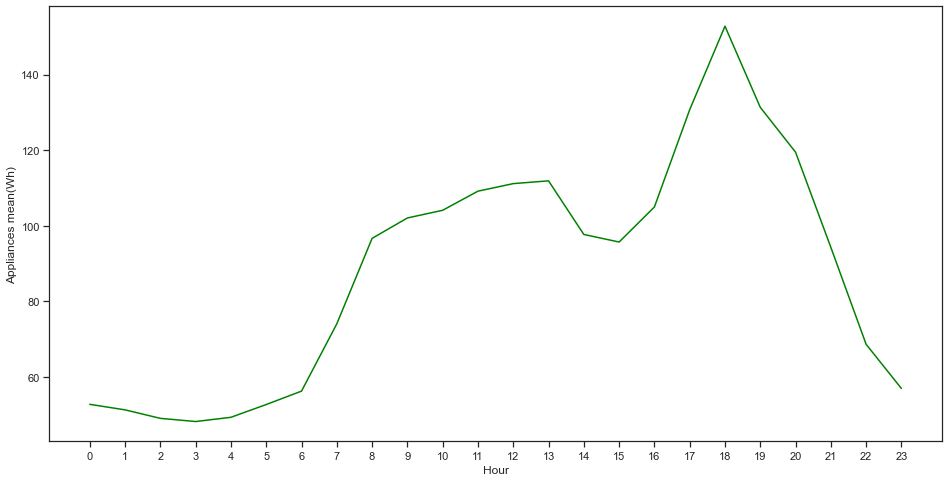

In [39]:
# 1時間単位のデータセットに変換
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df_hour = df.resample('1H').mean()

#  1日の1時間あたりの平均エネルギー消費量のプロット
df.groupby('hours')['Appliances'].mean().plot(figsize=(16,8),color = "green")
plt.xlabel('Hour')
plt.ylabel('Appliances mean(Wh)')
ticks = list(range(0, 24, 1))
plt.xticks(ticks);

df_hour

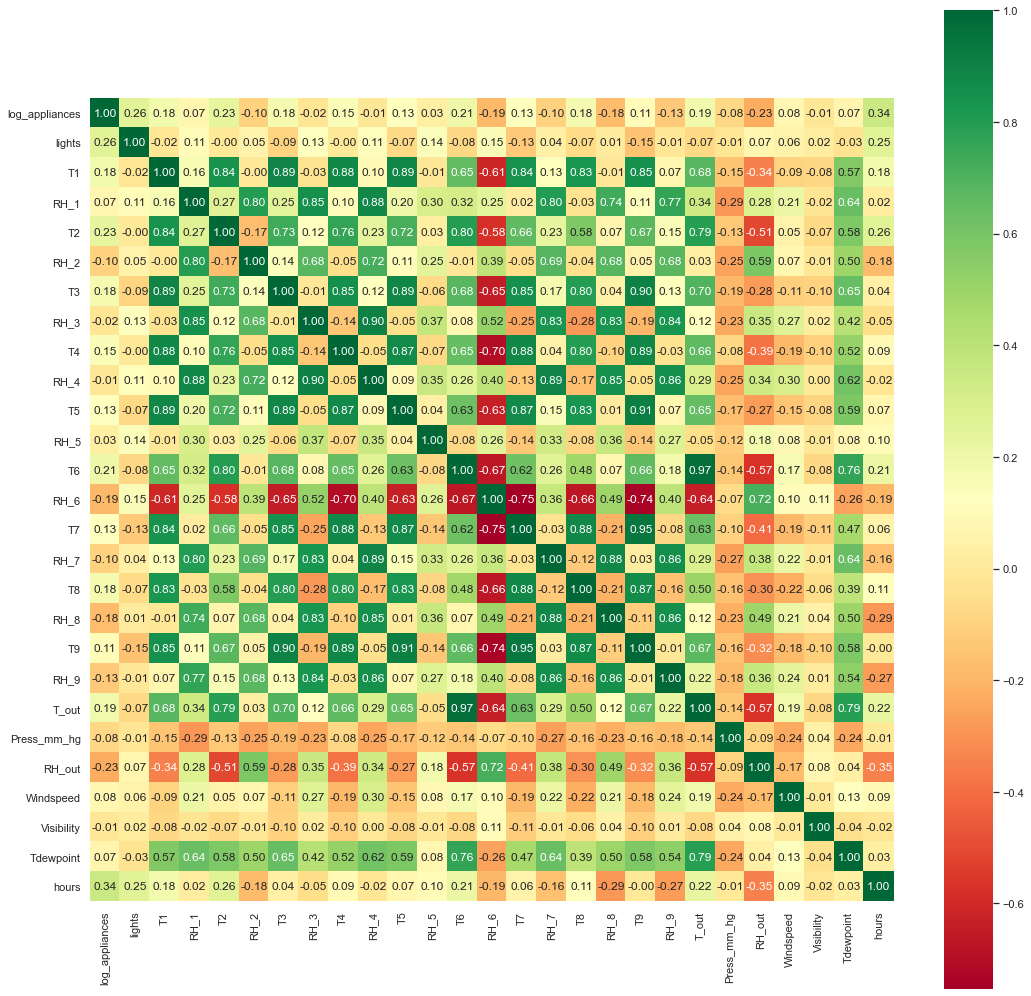

In [40]:
col = ['log_appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint','hours']
corr = df[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();
